In [1]:
import pandas as pd
import numpy as np
from IotTools import *
from IpyTools import *
from ipyleaflet import Map, basemaps

In [2]:
df_mess_test = pd.read_csv('mess_test_list.csv')

In [3]:
#Pour le jupyter la correction manuelle est désactivée
X_test= Correct_Bases (df_mess_test,False)

Nous avons 23 bases outliers
Base 9949 non vu
il reste 2 base avec lat >60


# Vérifions la position des bases du X_test avant et après la correction

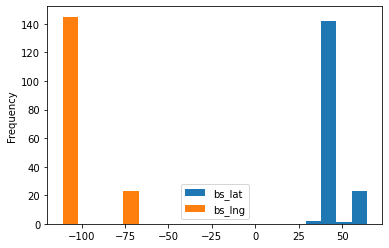

In [4]:
df_Coord_Base = df_mess_test[['bsid','bs_lat','bs_lng']].drop_duplicates(subset ='bsid', keep = 'first').set_index('bsid')
df_Coord_Base.head(1)
df_Coord_Base.plot(kind='hist',bins=20);

In [5]:
barycentre = ((df_Coord_Base.bs_lat.max()+df_Coord_Base.bs_lat.min())/2,(df_Coord_Base.bs_lng.min()+df_Coord_Base.bs_lng.max())/2)
barycentre

(50.414352225749994, -89.72859069949999)

In [6]:
df_out = df_Coord_Base[df_Coord_Base.bs_lat>60]
df_in = df_Coord_Base.drop(df_out.index)
df_out.shape,df_in.shape,df_Coord_Base.shape

((23, 2), (145, 2), (168, 2))

In [7]:
m = Map(center=barycentre, zoom=3, basemap = basemaps.OpenStreetMap.Mapnik)

dot_in = Give_Marker_Cluster(df_Coord_Base)

dot_out = Give_Marker_Cluster(df_out)

m.add_layer(dot_in)

m.add_layer(dot_out)
m

Map(center=[50.414352225749994, -89.72859069949999], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [8]:
df_Coord_Base_Corr = X_test[['bsid','bs_lat','bs_lng']].drop_duplicates(subset ='bsid', keep = 'first').set_index('bsid')

In [9]:
m = Map(center=barycentre, zoom=3, basemap = basemaps.OpenStreetMap.Mapnik)
dot_in = Give_Marker_Cluster(df_Coord_Base_Corr)
m.add_layer(dot_in)
m

Map(center=[50.414352225749994, -89.72859069949999], controls=(ZoomControl(options=['position', 'zoom_in_text'…

# On voit que notre système de correction fonctionne bien hormis pour une base

In [10]:
X_test[X_test.bs_lat>60].bsid.unique()

array([9949], dtype=int64)

In [11]:
df_mess_test[df_mess_test.bsid==9949]

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
13431,57b99c16cf554f465ad8de48,9949,472066.0,2.0,-122.000000,1.471782e+12,64.3,-68.5
13434,57b9eff912f1434591626c19,9949,472066.0,1.0,-118.666667,1.471803e+12,64.3,-68.5


In [12]:
X_test[X_test.bs_lat>64].drop_duplicates('bsid')

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
13431,57b99c16cf554f465ad8de48,9949,472066.0,2.0,-122.0,1.471782e+12,64.3,-68.5


# On voit qu'une seule base reste mal placée, qu'elle ne détecte qu'un seul device 

In [13]:
X_test[X_test.bs_lat>64].bsid.unique()

array([9949], dtype=int64)

In [14]:
X_test[X_test.bsid==9949].did.unique()

array([472066.])

# de part sa configuration il nous ai impossible de corriger automatique la position de cette base.

In [15]:
X_test[X_test.did==472066.0]

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
13431,57b99c16cf554f465ad8de48,9949,472066.0,2.0,-122.000000,1.471782e+12,64.300000,-68.500000
13434,57b9eff912f1434591626c19,9949,472066.0,1.0,-118.666667,1.471803e+12,64.300000,-68.500000
14667,57cbf92412f1437531983238,9936,472066.0,1.0,-118.333333,1.472985e+12,48.072889,-110.957181
14668,57cbf92412f1437531983238,9941,472066.0,1.0,-123.500000,1.472985e+12,48.072889,-110.957181
14669,57cbfbbfcf554f22dc736cb2,9936,472066.0,1.0,-111.333333,1.472986e+12,48.072889,-110.957181
14670,57cbfbbfcf554f22dc736cb2,9941,472066.0,1.0,-124.666667,1.472986e+12,48.072889,-110.957181
14989,57cfe9e9e541cd01b30fe633,9936,472066.0,1.0,-113.666667,1.473244e+12,48.072889,-110.957181
28670,5843e9a6cf554f422f2b7495,9936,472066.0,1.0,-127.500000,1.480846e+12,48.072889,-110.957181
28671,5843e9a6cf554f422f2b7495,9941,472066.0,2.0,-135.000000,1.480846e+12,48.072889,-110.957181


# Conclusion : au vu de la situation nous ferons une correction manuelle.

In [16]:
if (X_test[X_test.bsid==1].index.values).size == 0:
    print(True)
else :
    print(False)

True


In [17]:
a= X_test[X_test.bsid==9949].index.values
a=list(a)

In [18]:
X_test.loc[X_test[X_test.bsid==9949].index.values,'bs_lat']=48.072889
X_test.loc[X_test[X_test.bsid==9949].index.values,'bs_lng']=-110.957181

In [19]:
X_test[X_test.did==472066.0]

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
13431,57b99c16cf554f465ad8de48,9949,472066.0,2.0,-122.000000,1.471782e+12,48.072889,-110.957181
13434,57b9eff912f1434591626c19,9949,472066.0,1.0,-118.666667,1.471803e+12,48.072889,-110.957181
14667,57cbf92412f1437531983238,9936,472066.0,1.0,-118.333333,1.472985e+12,48.072889,-110.957181
14668,57cbf92412f1437531983238,9941,472066.0,1.0,-123.500000,1.472985e+12,48.072889,-110.957181
14669,57cbfbbfcf554f22dc736cb2,9936,472066.0,1.0,-111.333333,1.472986e+12,48.072889,-110.957181
14670,57cbfbbfcf554f22dc736cb2,9941,472066.0,1.0,-124.666667,1.472986e+12,48.072889,-110.957181
14989,57cfe9e9e541cd01b30fe633,9936,472066.0,1.0,-113.666667,1.473244e+12,48.072889,-110.957181
28670,5843e9a6cf554f422f2b7495,9936,472066.0,1.0,-127.500000,1.480846e+12,48.072889,-110.957181
28671,5843e9a6cf554f422f2b7495,9941,472066.0,2.0,-135.000000,1.480846e+12,48.072889,-110.957181


In [20]:
X_test[X_test.bs_lat>60].shape[0]

0